<h2 style="color:black;">Lab3 </h2>

<hr style="border:2px solid black;">

<h4 style="color:black;">Realised by:</h4>
<ul>
    <li><strong style="color:black;">Aicha Kharbach</strong></li>
</ul>

<h4 style="color:black;">Guided by:</h4> 
<ul>
    <li><strong style="color:black;">Pr . ELAACHAk LOTFI</strong></li>
</ul>
<p><strong>The main purpose behind this lab is to get familiar with NLP language models
using Sklearn library.</p>

# Part 1: Language Modeling / Regression 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from sklearn.model_selection import GridSearchCV
import re
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv('answers.csv')
data.head()

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0


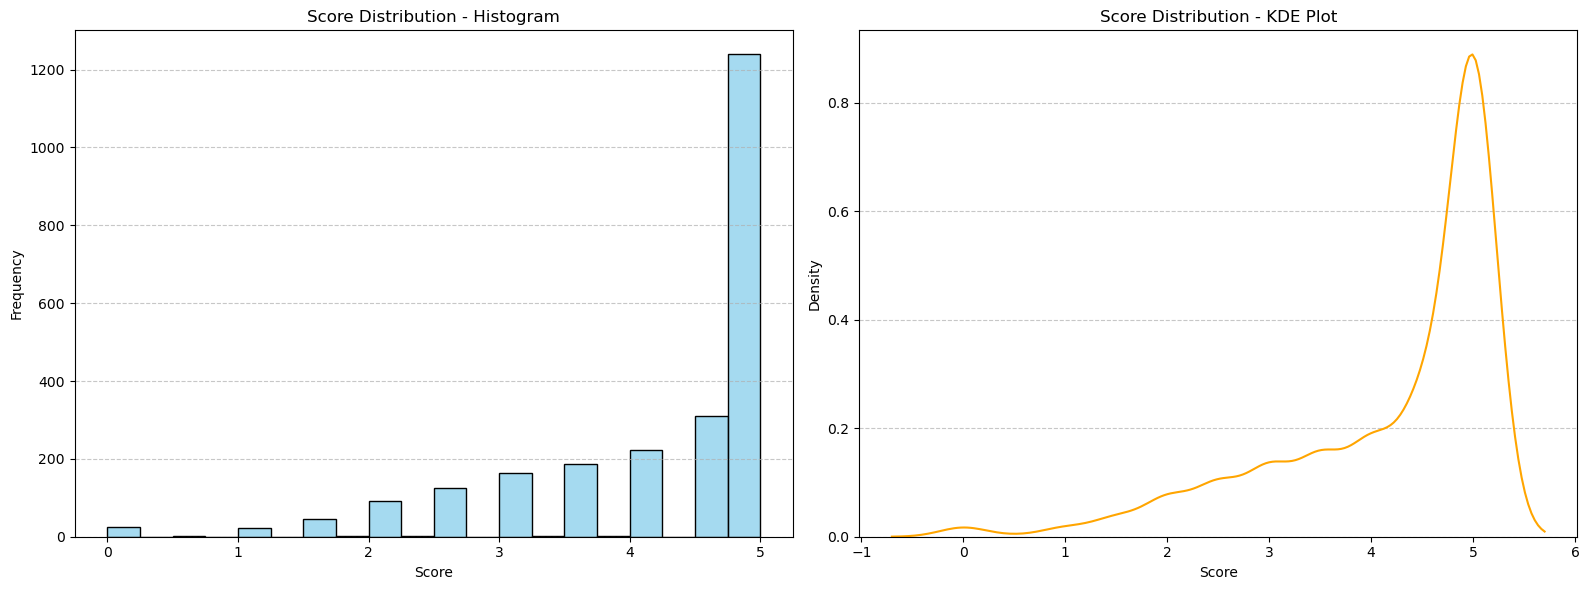

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data['score'], bins=20, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('Score Distribution - Histogram')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.kdeplot(data['score'], color='orange', ax=axs[1])
axs[1].set_title('Score Distribution - KDE Plot')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Density')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Data Preprocessing

In [6]:
def preprocess_text(text):
    
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

In [7]:
data["answer"] = data["answer"].apply(preprocess_text)
data

,id,answer,score,correct
0,1.1,"[high, risk, problem, address, prototype, prog...",3.5,0.0
1,1.1,"[simulate, portion, desired, final, product, q...",5.0,1.0
2,1.1,"[prototype, program, simulates, behavior, port...",4.0,1.0
3,1.1,"[defined, specification, phase, prototype, sti...",5.0,1.0
4,1.1,"[used, let, user, first, idea, completed, prog...",3.0,0.0
...,...,...,...,...
2437,12.1,"[log, n]",5.0,1.0
2438,12.1,"[minus, 1, divided, 2]",1.5,0.0
2439,12.1,[2n1],2.5,0.0
2440,12.1,"[take, h, step, h, height, tree]",5.0,1.0


# Feature Encoding with Word Embeddings

In [8]:
model = KeyedVectors.load_word2vec_format(r'GoogleNews-vectors-negative300.bin', binary=True)

In [9]:
def text_to_vec(text, model):
    vecs = []
    for word in text:
        if word in model.key_to_index:
            vecs.append(model[word])
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

In [10]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['answer'].apply(lambda x: ' '.join(x)))
print(X_bow[0])

  (0, 976)	1
  (0, 1882)	1
  (0, 1656)	1
  (0, 104)	1
  (0, 1692)	2
  (0, 1668)	2
  (0, 1287)	1
  (0, 2140)	1
  (0, 833)	1
  (0, 1305)	1
  (0, 136)	1
  (0, 2283)	1
  (0, 1969)	1
  (0, 391)	1
  (0, 2017)	1
  (0, 1609)	1
  (0, 1673)	1


In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['answer'].apply(lambda x: ' '.join(x)))
print(X_tfidf[0])

  (0, 1673)	0.2765129460793549
  (0, 1609)	0.2516291538993865
  (0, 2017)	0.21424124767532646
  (0, 391)	0.29106903138037477
  (0, 1969)	0.22674536171941803
  (0, 2283)	0.15209398517951273
  (0, 136)	0.16721543214247367
  (0, 1305)	0.18831681093444316
  (0, 833)	0.29106903138037477
  (0, 2140)	0.2460951871044503
  (0, 1287)	0.17850565575264057
  (0, 1668)	0.275576146361274
  (0, 1692)	0.34684088269120444
  (0, 104)	0.146881991157807
  (0, 1656)	0.16500552079983902
  (0, 1882)	0.29106903138037477
  (0, 976)	0.29106903138037477


In [12]:
df = data.copy()
df['answer'] = [text_to_vec(text, model) for text in df['answer']]
vec_matrix = np.array([vec for vec in df['answer']])
df.drop(['answer'], axis=1, inplace=True)
final_df = df.join(pd.DataFrame(vec_matrix))
final_df.columns = final_df.columns.astype(str)

In [13]:
X = final_df.drop(['id', 'score', ], axis=1)
y = final_df['score']

In [14]:
X

,correct,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,0.0,-0.011314,0.009007,0.036163,0.094203,-0.086490,0.018722,0.106346,0.020463,0.070989,...,-0.109144,0.056168,-0.094267,-0.002266,-0.000630,0.034838,-0.050432,-0.082519,-0.058517,-0.084094
1,1.0,0.060389,0.015101,0.001943,0.078427,-0.051615,-0.006441,0.117803,-0.036965,0.066339,...,-0.111039,0.037476,-0.037692,0.014641,-0.033205,0.092497,-0.027912,-0.017063,-0.050849,-0.066237
2,1.0,-0.026572,0.003052,0.023926,0.027011,-0.124079,0.011813,0.080247,-0.029785,0.052379,...,-0.120128,0.113636,-0.021476,-0.043010,0.050251,0.023088,0.028648,-0.092174,-0.106146,0.061167
3,1.0,-0.008671,0.014805,0.000142,0.075033,-0.145578,0.044373,0.101935,-0.095030,0.071394,...,-0.168329,0.041958,-0.046039,-0.039089,-0.018669,0.049331,-0.036801,-0.036714,-0.032854,0.002749
4,0.0,-0.004554,-0.003926,0.033550,0.072991,-0.047009,0.024852,0.105057,-0.020392,0.127749,...,-0.134584,0.128961,-0.055376,0.009431,-0.027363,0.014968,0.045993,-0.082018,-0.065550,-0.084932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,1.0,0.059906,-0.001709,-0.172974,0.051758,-0.112305,0.082764,0.064453,0.097168,-0.015137,...,0.093750,0.042542,0.026489,0.014893,-0.046875,-0.259277,0.060059,-0.158569,-0.154785,-0.022278
2438,0.0,0.057083,-0.097229,0.092163,0.070007,-0.083618,0.013002,-0.010864,-0.219482,0.080505,...,-0.066467,0.048859,-0.047043,0.087646,-0.072632,-0.008606,-0.140869,-0.116821,-0.064392,0.026764
2439,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2440,1.0,-0.039510,0.178182,-0.027710,-0.015666,-0.085327,-0.125814,0.041423,-0.071615,0.065877,...,-0.049072,0.149902,-0.137634,0.075846,-0.028071,-0.089600,-0.154867,-0.002360,-0.088175,0.027323


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# Model Training with Various Algorithms

In [16]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression Evaluation:")
print("Linear Regression Evaluation:")
lr_eval = evaluate_model(y_test, lr_pred)
print(lr_eval)

Linear Regression Evaluation:
Linear Regression Evaluation:
{'MSE': 0.2670100004862311, 'RMSE': 0.516730104102936, 'MAE': 0.3785642715280082}


In [18]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}
dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid, cv = 10, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 30}


In [19]:
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(X_train, y_train)
best_dt_pred = best_dt_model.predict(X_test)
print("Best Decision Tree Evaluation:")
dt_eval = evaluate_model(y_test, best_dt_pred)
print(dt_eval)

Best Decision Tree Evaluation:
{'MSE': 0.290600277277291, 'RMSE': 0.539073536057272, 'MAE': 0.3641386804847987}


In [20]:
# Support Vector Regression with GridSearch
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

svr_model = SVR()
grid_search_svr = GridSearchCV(svr_model, svr_param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
best_svr_params = grid_search_svr.best_params_
print("Best SVR Parameters:", best_svr_params)


Best SVR Parameters: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}


In [21]:
best_svr_model = SVR(**best_svr_params)
best_svr_model.fit(X_train, y_train)
best_svr_pred = best_svr_model.predict(X_test)
print("Best SVR Evaluation:")
svr_eval = evaluate_model(y_test, best_svr_pred)
print(svr_eval)

Best SVR Evaluation:
{'MSE': 0.22650124933636814, 'RMSE': 0.475921473918091, 'MAE': 0.3538366542557202}


# Model Evaluation and Selection

In [22]:
# Error metrics for each model
error_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVM'],
    'MSE': [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, best_dt_pred), mean_squared_error(y_test, best_svr_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_pred)), np.sqrt(mean_squared_error(y_test, best_dt_pred)), np.sqrt(mean_squared_error(y_test, best_svr_pred))],
    'MAE': [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, best_dt_pred), mean_absolute_error(y_test, best_svr_pred)]
}
error_df = pd.DataFrame(error_data)
print("Error metrics for each model:")
print(error_df)

Error metrics for each model:
               Model       MSE      RMSE       MAE
0  Linear Regression  0.267010  0.516730  0.378564
1      Decision Tree  0.290600  0.539074  0.364139
2                SVM  0.226501  0.475921  0.353837


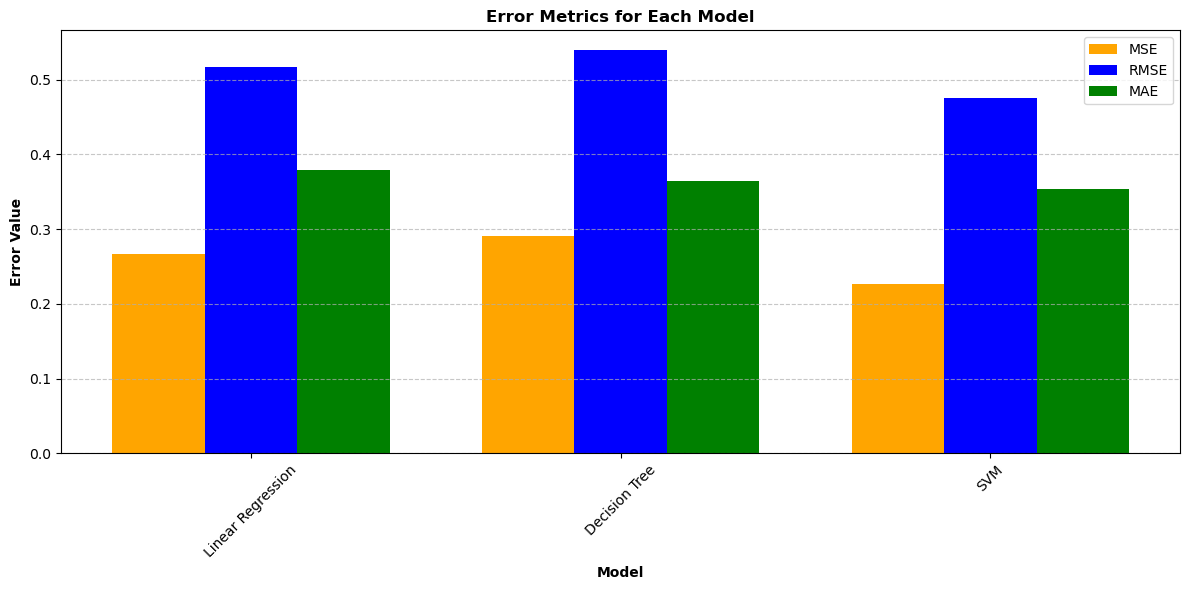

In [23]:
# Error metrics for each model
models = ['Linear Regression', 'Decision Tree', 'SVM']
mse_values = [lr_eval['MSE'], dt_eval['MSE'], svr_eval['MSE']]
rmse_values = [lr_eval['RMSE'], dt_eval['RMSE'], svr_eval['RMSE']]
mae_values = [lr_eval['MAE'], dt_eval['MAE'], svr_eval['MAE']]

bar_width = 0.25

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, mse_values, color='orange', width=bar_width, label='MSE')
plt.bar(r2, rmse_values, color='blue', width=bar_width, label='RMSE')
plt.bar(r3, mae_values, color='green', width=bar_width, label='MAE')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)

plt.ylabel('Error Value', fontweight='bold')
plt.title('Error Metrics for Each Model', fontweight='bold')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()